<a href="https://colab.research.google.com/github/dn-bit/Using-ARIMA-and-SARIMAX/blob/main/ARIMA_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("AirPassengers.csv")

In [ ]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

<Axes: >

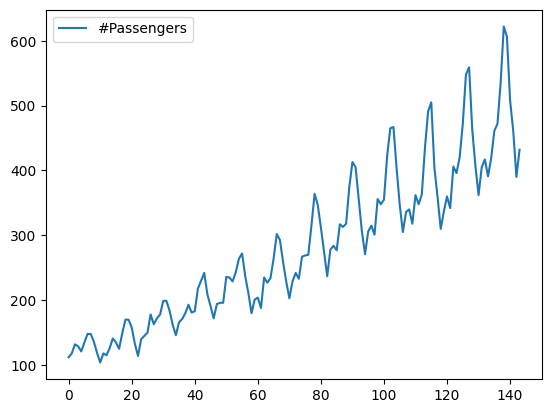

In [ ]:
df.plot()

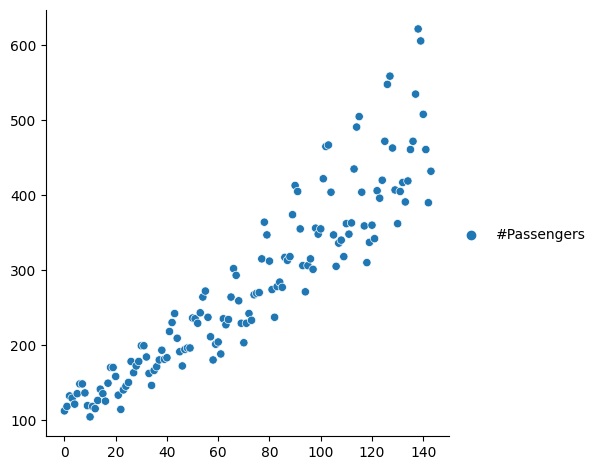

In [ ]:
import seaborn as sns

sns.relplot(df)

In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [ ]:
#dickey fuller test applied on the data

from statsmodels.tsa.stattools import adfuller

def check(series):
  result=adfuller(series)
  print("adf value",result[0])
  print("p value",result[1])
  if result[1]<=0.05:
    print("stationary")
  else:
    print("not a stationary")



In [ ]:
check(df['#Passengers'])

adf value 0.8153688792060498
p value 0.991880243437641
not a stationary


<Axes: >

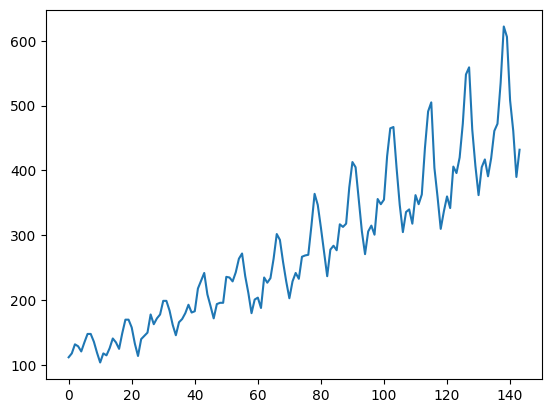

In [ ]:
df['#Passengers'].plot()

In [ ]:
#do diffrencing

df['#Passengers_1st']=df['#Passengers']-df['#Passengers'].shift(1)

In [ ]:
df['#Passengers_1st'].dropna(axis=0,inplace=True)

In [ ]:
df.head()

,Month,#Passengers,#Passengers_1st
0,1949-01-01,112,NaN
1,1949-02-01,118,6.0
2,1949-03-01,132,14.0
3,1949-04-01,129,-3.0
4,1949-05-01,121,-8.0


In [ ]:
check(df['#Passengers_1st'].dropna())

adf value -2.8292668241700047
p value 0.05421329028382478
not a stationary


<Axes: >

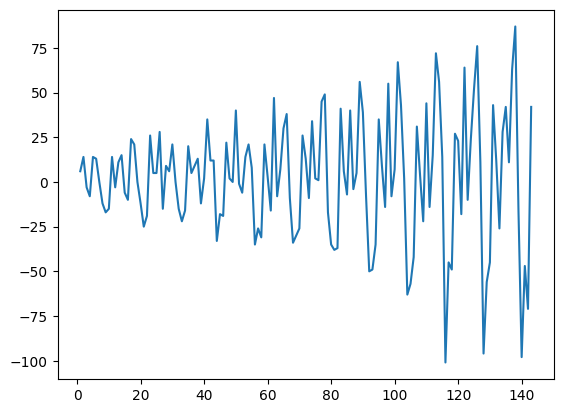

In [ ]:
df['#Passengers_1st'].plot()

In [ ]:
#second differencing

df['#Passengers_2nd']=df['#Passengers_1st']-df['#Passengers_1st'].shift(1)

In [ ]:
df['#Passengers_2nd'].head()

0     NaN
1     NaN
2     8.0
3   -17.0
4    -5.0
Name: #Passengers_2nd, dtype: float64

<Axes: >

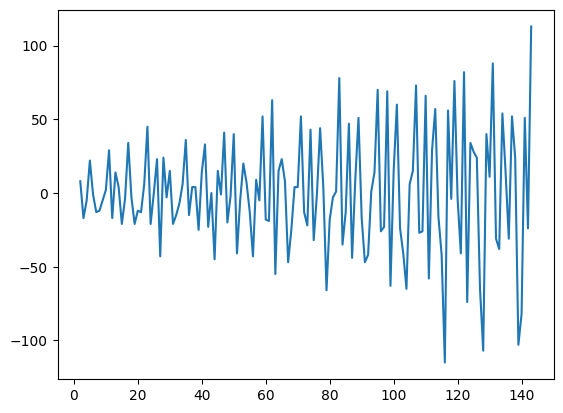

In [ ]:
df['#Passengers_2nd'].plot()

In [ ]:
check(df['#Passengers_2nd'].dropna())

adf value -16.384231542468513
p value 2.7328918500142026e-29
stationary


In [ ]:
df['#Passengers_12']=df['#Passengers']-df['#Passengers'].shift(12)

In [ ]:
check(df['#Passengers_12'].dropna())

adf value -3.383020726492481
p value 0.011551493085514952
stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

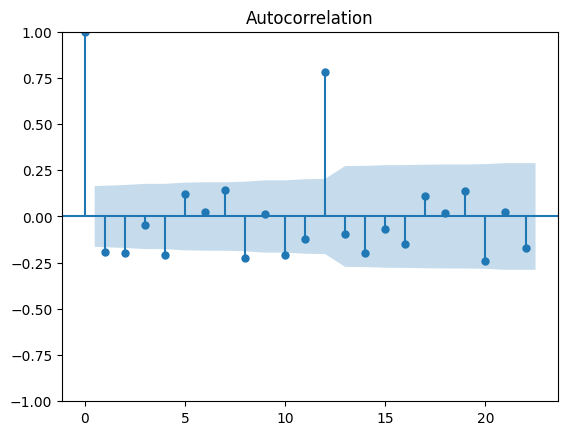

In [ ]:
acf=plot_acf(df['#Passengers_2nd'].dropna())

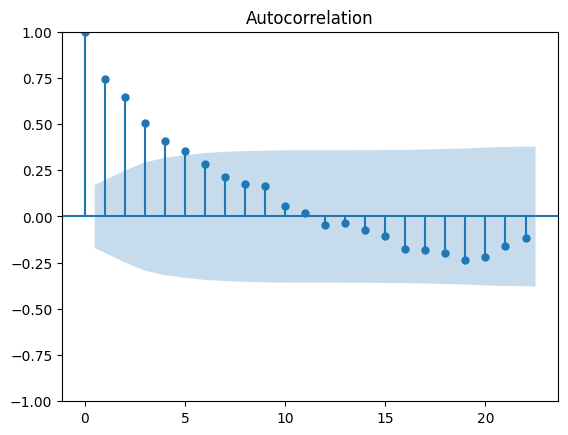

In [ ]:
acf_12=plot_acf(df['#Passengers_12'].dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


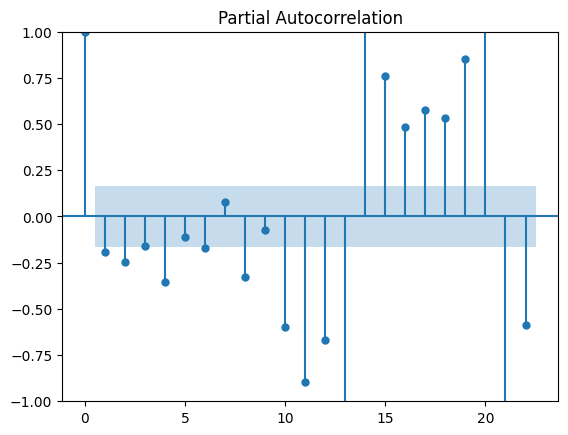

In [ ]:
pacf=plot_pacf(df['#Passengers_2nd'].dropna())

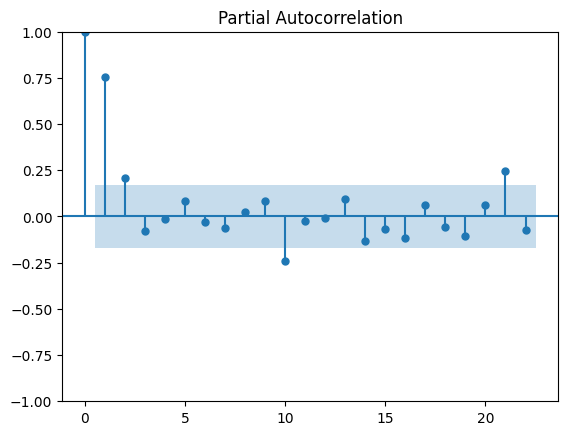

In [ ]:
pacf=plot_pacf(df['#Passengers_12'].dropna())

In [ ]:
df

,Month,#Passengers,#Passengers_1st,#Passengers_2nd,#Passengers_12
0,1949-01-01,112,NaN,NaN,NaN
1,1949-02-01,118,6.0,NaN,NaN
2,1949-03-01,132,14.0,8.0,NaN
3,1949-04-01,129,-3.0,-17.0,NaN
4,1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...,...
139,1960-08-01,606,-16.0,-103.0,47.0
140,1960-09-01,508,-98.0,-82.0,45.0
141,1960-10-01,461,-47.0,51.0,54.0
142,1960-11-01,390,-71.0,-24.0,28.0


In [ ]:
from datetime import datetime,timedelta

train_data_end=datetime(1955,12,1)
test_data_end=datetime(1960,12,1)

In [ ]:
df['Month']=df.set_index('Month',inplace=True)

In [ ]:
train_data=df[:train_data_end]
test_data=df[train_data_end+timedelta(days=1):test_data_end]

### ARIMA model implementation

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
model_arima=ARIMA(train_data['#Passengers'],order=(10,2,0))

In [ ]:
model_fit=model_arima.fit()

In [ ]:
#summary of ARIMA model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:                ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                Wed, 03 May 2023   AIC                            736.477
Time:                        04:24:08   BIC                            762.951
Sample:                    01-01-1949   HQIC                           747.106
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_data_start=test_data.index[0]
pred_data_end=test_data.index[-1]

In [ ]:
pred=model_fit.predict(start=pred_data_start,end=pred_data_end)

In [ ]:
residuals=test_data['#Passengers']-pred

In [ ]:
residuals.head()

Month
1956-01-01   -16.183612
1956-02-01   -32.478355
1956-03-01     0.556985
1956-04-01     5.172456
1956-05-01    -0.544234
dtype: float64

In [ ]:
pred.head()

1956-01-01    300.183612
1956-02-01    309.478355
1956-03-01    316.443015
1956-04-01    307.827544
1956-05-01    318.544234
Freq: MS, Name: predicted_mean, dtype: float64

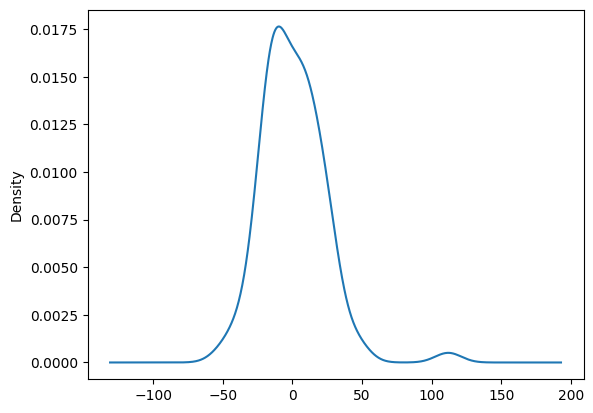

In [ ]:
import matplotlib.pyplot as plt

model_fit.resid.plot(kind='kde')
plt.show()

In [ ]:
df['pred_arima']=pred

In [ ]:
df.head()

,#Passengers,#Passengers_1st,#Passengers_2nd,#Passengers_12,Month,pred_arima
Month,,,,,,
1949-01-01,112,NaN,NaN,NaN,None,NaN
1949-02-01,118,6.0,NaN,NaN,None,NaN
1949-03-01,132,14.0,8.0,NaN,None,NaN
1949-04-01,129,-3.0,-17.0,NaN,None,NaN
1949-05-01,121,-8.0,-5.0,NaN,None,NaN


<Axes: xlabel='Month'>

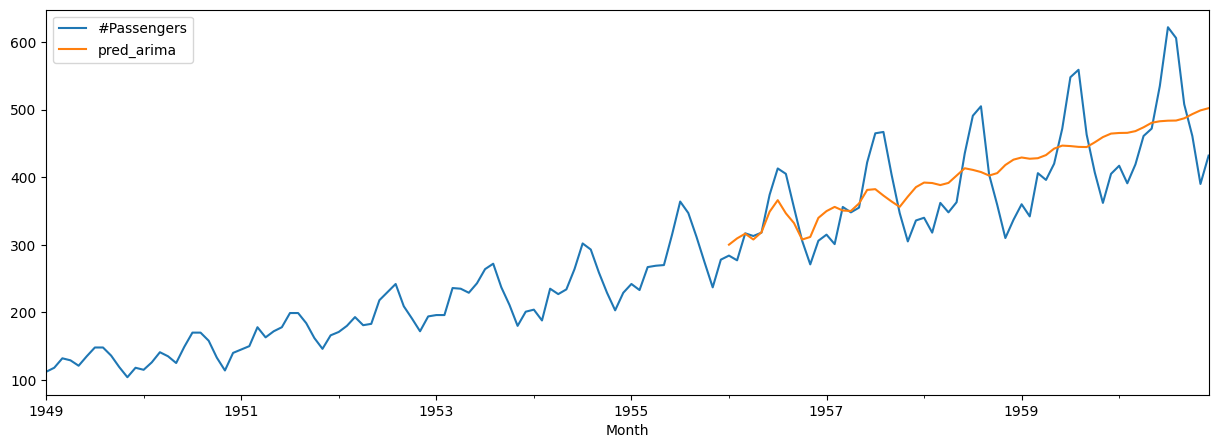

In [ ]:
df[['#Passengers','pred_arima']].plot(figsize=(15,5))

### SARIMAX implementation on seasonal data

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarima=SARIMAX(df['#Passengers'],order=(0,2,0),seasonal_order=(0,1,0,12))

In [ ]:
model_sarima_fit=model_sarima.fit()

In [ ]:
pred_sr=model_sarima_fit.predict(start=pred_data_start,end=pred_data_end)

In [ ]:
residuals=df['#Passengers']-pred


In [ ]:
residuals

1949-01-01     NaN
1949-02-01     NaN
1949-03-01     NaN
1949-04-01     NaN
1949-05-01     NaN
              ... 
1960-08-01   -38.0
1960-09-01    25.0
1960-10-01    11.0
1960-11-01   -35.0
1960-12-01    25.0
Length: 144, dtype: float64

In [ ]:
df['pred_sarimax']=pred_sr

In [ ]:
df.head(20)

,#Passengers,#Passengers_1st,#Passengers_2nd,#Passengers_12,Month,pred_arima,pred_sarimax
Month,,,,,,,
1949-01-01,112,NaN,NaN,NaN,None,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,None,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,None,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,None,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,None,NaN,NaN
1949-06-01,135,14.0,22.0,NaN,None,NaN,NaN
1949-07-01,148,13.0,-1.0,NaN,None,NaN,NaN
1949-08-01,148,0.0,-13.0,NaN,None,NaN,NaN
1949-09-01,136,-12.0,-12.0,NaN,None,NaN,NaN


<Axes: xlabel='Month'>

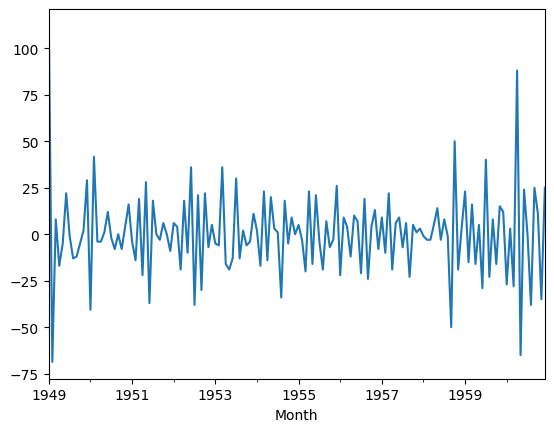

In [ ]:
model_sarima_fit.resid.plot()

<Axes: xlabel='Month'>

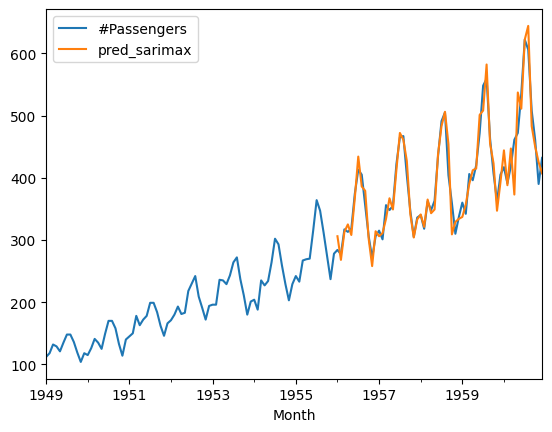

In [ ]:
df[['#Passengers','pred_sarimax']].plot()

<Axes: xlabel='Month'>

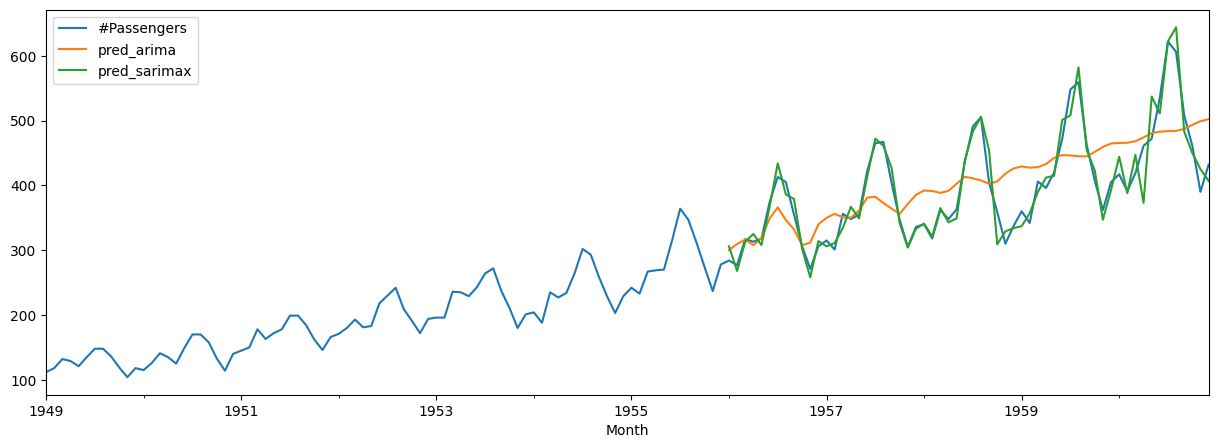

In [ ]:
#plotting all three normal,using arima and using sarimax

df[['#Passengers','pred_arima','pred_sarimax']].plot(figsize=(15,5))